In [7]:
import rasterio
import pandas as pd
from rasterio import plot
import rioxarray as rxr
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from rasterio.crs import CRS
%matplotlib inline

In [8]:
month = 'dec'
ndvi_files_list = glob('report/ancillary/modis_ndvi/'+month+'/*_ndvi.tif')
ndvi_files_list

['report/ancillary/modis_ndvi/dec\\dec_ndvi.tif']

In [9]:
# ndvi = rxr.open_rasterio(ndvi_files_list[2])
ndvi = rxr.open_rasterio(ndvi_files_list[0])
crs_wgs84 = CRS.from_string('EPSG:4326')
ndvi = ndvi.rio.reproject(crs_wgs84)


# month = 'july'
ndvi.rio.to_raster('report/ancillary/modis_ndvi/'+month+'/ndvi_'+month+'_reprojected.tif')

In [ ]:
# From here onwards code not used

In [40]:
cygnss_data = pd.read_csv('C:/Cygnss/cygnsslib-1.1.18/src/code/'+month+'_quality_above_thresh.csv')

In [41]:
preff = cygnss_data['preff']
sp_lat = cygnss_data['sp_lat']
sp_lon = cygnss_data['sp_lon']
inc_angle = cygnss_data['sp_inc_angle']

In [42]:
soil_files_list = glob('soils/soils/*.tif')
ele_files_list = glob('3dep_13/3dep_13/*.tif')

In [43]:
ndvi = rasterio.open('report/ancillary/modis_ndvi/'+month+'/ndvi_'+month+'_reprojected.tif')
elevation = rasterio.open(ele_files_list[0])
clay = rasterio.open(soil_files_list[0])
depres = rasterio.open(soil_files_list[1])
sand = rasterio.open(soil_files_list[2])
silt = rasterio.open(soil_files_list[3])

In [44]:
elevation_data = elevation.read(1)
clay_data = clay.read(1)
depres_data = depres.read(1)
sand_data = sand.read(1)
silt_data = silt.read(1)
ndvi_data = ndvi.read(1)

In [45]:
clay_data = np.where(
clay_data < 0,
0.,
clay_data)

sand_data = np.where(
sand_data < 0,
0.,
sand_data)

silt_data = np.where(
silt_data < 0,
0.,
silt_data)

depres_data = np.where(
depres_data < 0,
0.,
depres_data)

# ndvi_data = np.where(
# ndvi_data < 0,
# 0.,
# ndvi_data)

In [46]:
eles = []
cls = []
snds = []
sils = []
deps = []
ndvis = []
for i in range(cygnss_data.shape[0]):
    lat = sp_lat[i]
    lon = sp_lon[i]
    
    
    
    ele_ind = elevation.index(lon, lat)
#     if ele_ind[1] == 4035:
#         ele_ind = (ele_ind[0], 4033)
    clay_ind = clay.index(lon, lat)
    sand_ind = sand.index(lon, lat)
    silt_ind = silt.index(lon, lat)
    depres_ind = depres.index(lon, lat)
    ndvi_ind = ndvi.index(lon, lat)
    
    eles.append(elevation_data[ele_ind])
    cls.append(clay_data[clay_ind])
    snds.append(sand_data[sand_ind])
    sils.append(silt_data[silt_ind])
    deps.append(depres_data[depres_ind])
    ndvis.append(ndvi_data[ndvi_ind])

In [47]:
d = {'preff':preff, 'inc_angle':inc_angle, 'elevation':eles, 'clay':cls, 'sand':snds, 'silt':sils, 'depres':deps, 'ndvi':ndvis}
anc_data = pd.DataFrame(d)

In [44]:
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

In [45]:
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:5,:5]
ndvi = np.where(
ndvi < 0.,
0,
ndvi)

C:\Users\mathurs\Anaconda3\envs\geo_env_2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [46]:
ndviImage = rasterio.open('C:/Cygnss/Landsat/july/ndvi_image_july.tif','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

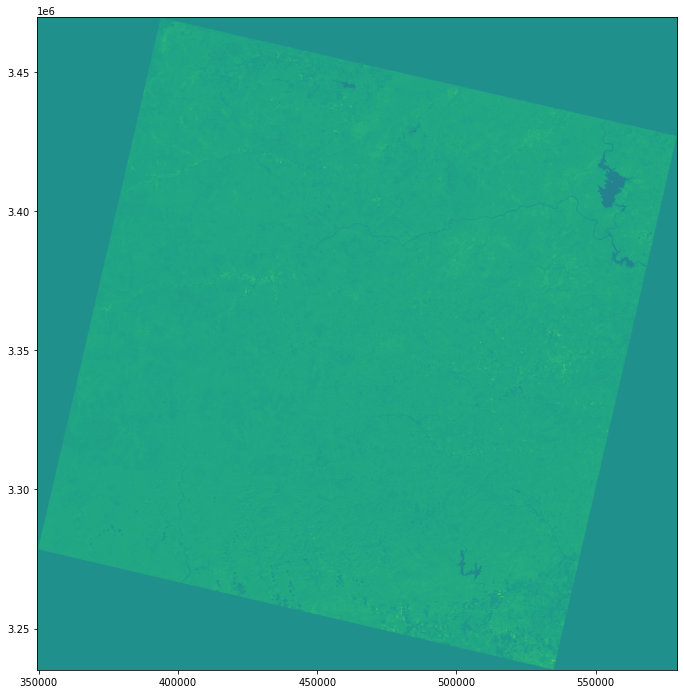

<AxesSubplot:>

In [23]:
ndvi = rasterio.open('ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi)